Linear Algebra Course Notes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

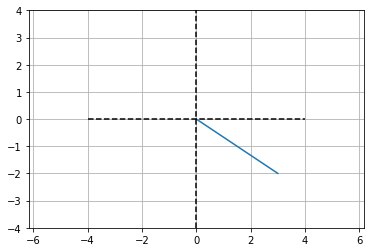

In [2]:
# Algebraic and geometric interpretations

# 2-dimensional vector
v2 = [3, -2]

# 3-dimensional vector
v3 = [4, -3, 2]

# row to column (or vice-versa):
v3t = np.transpose(v3)


# plot the 2D vector
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()

In [ ]:
# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.axes(None, projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()
